In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

volatility: 10
    Seed: 400
Vol: 10 1436.3823939817594 400
    Seed: 401
Vol: 10 2724.627455631164 401
    Seed: 402
Vol: 10 4291.352521715039 402
    Seed: 403
Vol: 10 5663.861824465108 403
    Seed: 404
Vol: 10 7077.159178464179 404
    Seed: 405
Vol: 10 8387.144064380984 405
    Seed: 406
Vol: 10 9744.31770088191 406
    Seed: 407
Vol: 10 11114.664445419012 407
    Seed: 408
Vol: 10 12759.475105257088 408
    Seed: 409
Vol: 10 14106.97787546931 409
volatility: 50
    Seed: 400
Vol: 50 1475.9114818200608 400
    Seed: 401
Vol: 50 2874.4028299312386 401
    Seed: 402
Vol: 50 4366.293857726561 402
    Seed: 403
Vol: 50 5809.535941382783 403
    Seed: 404
Vol: 50 7198.505640322202 404
    Seed: 405
Vol: 50 8475.910942609842 405
    Seed: 406
Vol: 50 9866.25237142697 406
    Seed: 407
Vol: 50 11257.832349106462 407
    Seed: 408
Vol: 50 12906.857515948323 408
    Seed: 409
Vol: 50 14309.164771957487 409
volatility: 100
    Seed: 400
Vol: 100 1617.1003758957322 400
    Seed: 401
Vol: 100

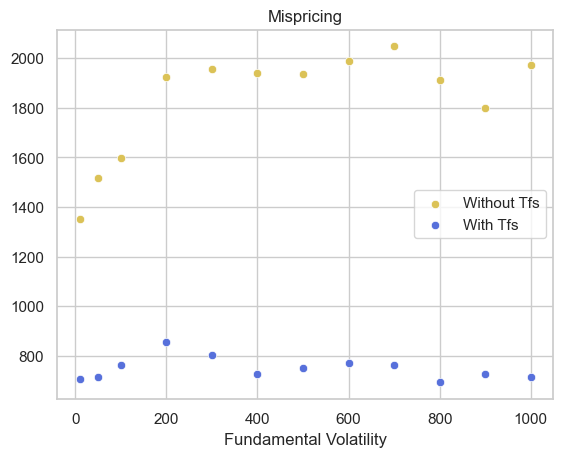

In [8]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(400, 410):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[1000, 1500],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 8,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)
            # print(f"{f[times_no_trend[i]]} {prices_no_trend[i]} {f[times_no_trend[i]] - prices_no_trend[i]}")

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)

        # print(f"volatilty: {seed} {rmsd_nt} nt")
       
        # print(f"    {squared_diff_nt}")
       
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[1000, 1500],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 8,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue

            # print(f"{f[times_trend[i]]} {prices_trend[i]} {f[times_trend[i]] - prices_trend[i]}")
            squared_diff_t.append((-f[times_trend[i]] + prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += rmsd_t
        print(f"Vol: {volatility} {plot_trend[volatility]} {seed}")
        # print(f"volatilty: {seed} {rmsd_t}")
        
        # print(f"    {squared_diff_t}")


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 20)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 20)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.b/"

# save plot
plt.savefig(base + f"6.9.b_SELL_changed.png")


volatility: 10
    Seed: 200
1000000000.0 1000000654.0087299 -654.0087299346924
1000000000.0 1000000766.0209655 -766.0209654569626
1000000000.0 1000000772.0874053 -772.0874053239822
1000000000.0 1000000793.2501119 -793.2501119375229
1000000000.0 1000000862.8973325 -862.8973325490952
1000000000.0 1000000966.935843 -966.9358429908752
1000000000.0 1000001026.2443804 -1026.2443803548813
1000000000.0 1000001103.8571469 -1103.857146859169
1000000000.0 1000001109.3771713 -1109.3771712779999
1000000000.0 1000001130.7414018 -1130.7414017915726
1000000000.0 1000001144.2029245 -1144.202924489975
1000000000.0 1000001253.4838635 -1253.4838634729385
1000000000.0 1000001268.1691873 -1268.1691873073578
1000000000.0 1000001328.3978597 -1328.3978596925735
1000000000.0 1000001352.1554376 -1352.1554375886917
1000000000.0 1000001375.548143 -1375.548143029213
1000000000.0 1000001425.9648083 -1425.964808344841
1000000000.0 1000001435.3851695 -1435.385169506073
1000000000.0 1000001439.6716771 -1439.6716771125

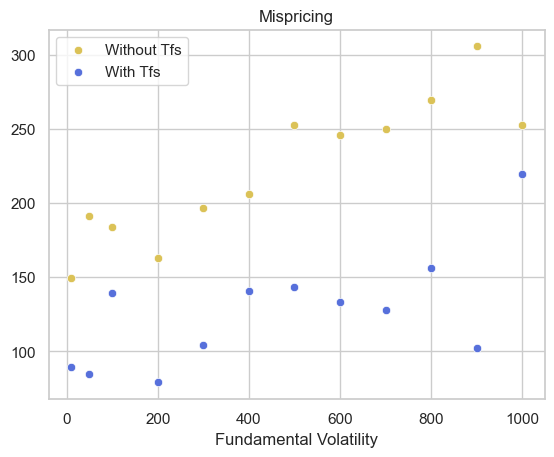

In [3]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(200, 201):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[1000, 1500],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = BUY,
                L = 8,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)
            print(f"{f[times_no_trend[i]]} {prices_no_trend[i]} {f[times_no_trend[i]] - prices_no_trend[i]}")

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)

        # print(f"volatilty: {seed} {rmsd_nt} nt")
       
        # print(f"    {squared_diff_nt}")
       
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[1000, 1500],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = BUY,
                L = 8,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue

            print(f"{f[times_trend[i]]} {prices_trend[i]} {f[times_trend[i]] - prices_trend[i]}")
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += rmsd_t
        # print(f"volatilty: {seed} {rmsd_t}")
        
        # print(f"    {squared_diff_t}")


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 20)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 20)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.b/"

# save plot
plt.savefig(base + f"6.9.b_SELL_changed.png")
